# Computational Social Science Project #3 

**Enter your Name:** Jonah Lin

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

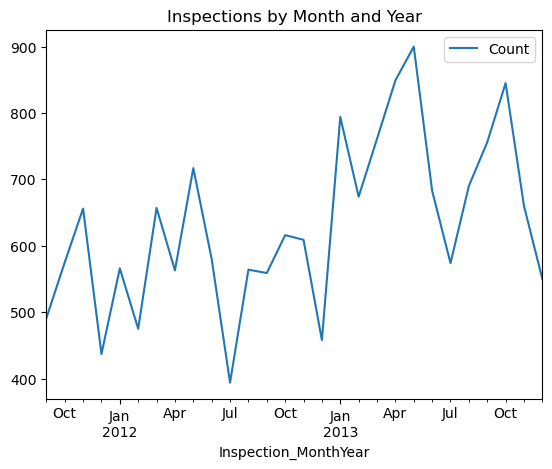

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

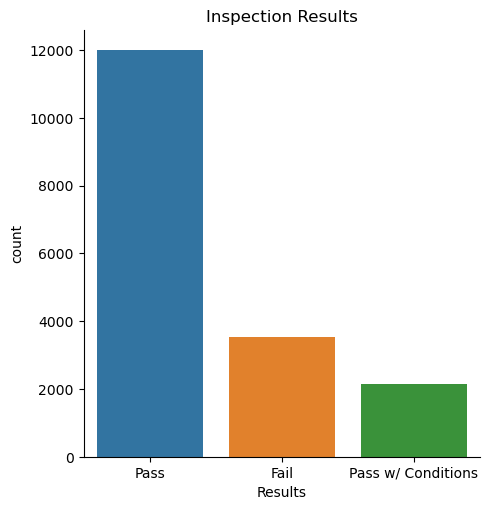

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

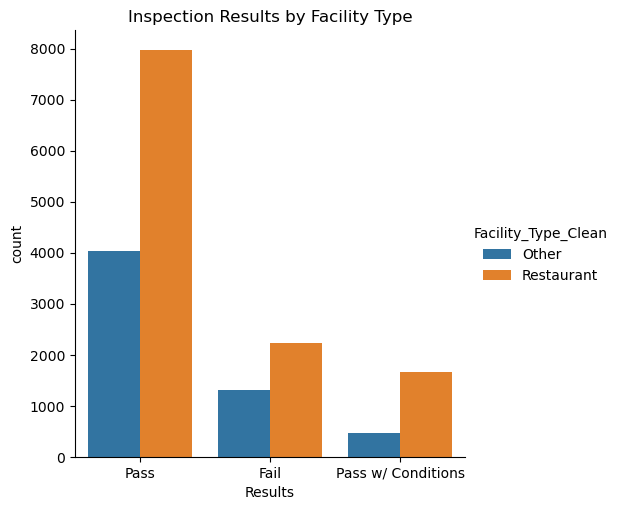

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

Also dropping the following columns to avoid inconsistency of variables, e.g. 2013 data has 'theater' in 'Facility_Type' but 2014 doesn't:
- Facility_Type
- LICENSE_DESCRIPTION
- WARD_PRECINCT

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 'Facility_Type', 'LICENSE_DESCRIPTION', 'WARD_PRECINCT'])

# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [13]:
# Set seed
np.random.seed(10)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

### Model 1 - Logistic Regression

Explain:\
Logistic regression is a classification method with equation expression. It assumes that the data points distribute along a logistic or sigmoid curve and the noise between data points and the curve is normally distributed.\
This model has the advantage of expressing the classification relationship with an equation and also returning the corresponding possibilties for each data points in addition to classification results. But in this model, some data points can lie around the middle point like the probability of 0.5. Data points around the middle point may have relatively low accuracy.

In [15]:
logit_reg = LogisticRegression()


grid_values = {'C': [0.01,0.1,1,10,100]}


cv = KFold(n_splits=5,random_state=10,shuffle=True) 
lr_cv = GridSearchCV(logit_reg, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=0)
lr_cv.fit(X, y)


logit_model = lr_cv.best_estimator_

In [16]:
lr_cv.best_params_

{'C': 10}

###  Model 2 - Random Forest

Explain:\
Random Forest Classifier is a classification use of the ensemble learning method Random Forest. In many different trees, random forest classifier randomly chooses certain features (instead of all features) to determine the splits. The results are based on the major vote of all trees. This model assumes that the randomly bagging of features reduces the correlation of selected features for splitting and improves the accuracy of prediction.\
The random forest model has the advantage of high accuracy in prediction. However, due to the randomness feature selection process and bagging process, this model have very low interpretability.

In [17]:
grid_values = {'n_estimators': [100],
               'criterion': ['gini'],
               'max_depth': [None],
               'min_samples_split': [2,3,4,5],
               'min_samples_leaf': [1],
               'min_weight_fraction_leaf': [0.0],
               'max_features': [None],
               'max_leaf_nodes': [None],
               'min_impurity_decrease': [1e-07],
               'random_state': [10]} 

rf_classifier = RandomForestClassifier()
cv = KFold(n_splits=5,random_state=10,shuffle=True) 
rf_cv = GridSearchCV(rf_classifier, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=0)
rf_cv.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [1e-07],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'random_state': [10]},
             scoring='accuracy')

In [18]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'random_state': 10}

In [19]:
rf_cv.best_estimator_

RandomForestClassifier(max_features=None, min_impurity_decrease=1e-07,
                       min_samples_split=4, random_state=10)

### Model 3 - Adaptive Boosting

Explain:\
Adaptive boosting focuses on improving the performances on weak learners in previous learning step by assigning large weights to incorrect prediction in previous step.\
With more targeted datapoints to improve, AdaBoost can improve prediction result compared to random forests. However, since its algorithm is highly based on errors in preceding step, it may be more likely to have the problem of overfitting than other classification algorithms.

In [20]:
grid_values = {'n_estimators': [50, 100, 150, 200]} 

ada_classifier = AdaBoostClassifier()
cv = KFold(n_splits=5,random_state=10,shuffle=True) 
ada_cv = GridSearchCV(ada_classifier, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=0)
ada_cv.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [21]:
ada_cv.best_params_

{'n_estimators': 150}

In [22]:
ada_cv.best_estimator_

AdaBoostClassifier(n_estimators=150)

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

**Answer** :
\
In this case, correctly predicting positive results (true fails) from all postive facts (fail facts) is more important than other metrics, because this metric can make model miss the least fail cases. Therefore, the metric of recall is selected.
\
Based on the recall rates in table below, Random Forest (rf_cv.best_estimator_) is selected as the model for the prediction tasks.

In [23]:
from sklearn.model_selection import cross_validate, cross_val_score

In [24]:
# loop through each model to report accuracy
# ----------
for clf, label in zip([logit_model, rf_cv.best_estimator_, ada_cv.best_estimator_], 
                      ['Logistic Regression', 'Random Forest', 'AdaBoost']):
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        scores = cross_val_score(clf, 
                                 X, 
                                 y,
                                 scoring=metric, 
                                 cv=5)
        print('[%s]: %0.4f [%s]' % (metric, scores.mean(), label))

[accuracy]: 0.9172 [Logistic Regression]
[precision]: 0.7727 [Logistic Regression]
[recall]: 0.8416 [Logistic Regression]
[f1]: 0.8038 [Logistic Regression]
[accuracy]: 0.9231 [Random Forest]
[precision]: 0.7703 [Random Forest]
[recall]: 0.8828 [Random Forest]
[f1]: 0.8223 [Random Forest]
[accuracy]: 0.9158 [AdaBoost]
[precision]: 0.7796 [AdaBoost]
[recall]: 0.8144 [AdaBoost]
[f1]: 0.7952 [AdaBoost]


| Model                 | Accuracy    | Precision    | Recall     | F1     |
| --------------------- | ----------- | ------------ | ---------- | ------ |
| Logistic Regression   | 0.9172      | 0.7727       | 0.8416     | 0.8038 |
| Random Forest         | 0.9231      | 0.7703       | 0.8828     | 0.8223 |
| AdaBoost              | 0.9158      | 0.7796       | 0.8144     | 0.7952 |

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

**Answer**:
\
The top features in contribution to predictions varies across different models. Some of the common top features are 'seriousCount', 'humidity' and 'heat_garbage'.\
If possible to add to the dataset, the features of "Annual Revenue", "Net Profit", "Total of Tax Collected", and "Whether own the property" may also help in building the model.

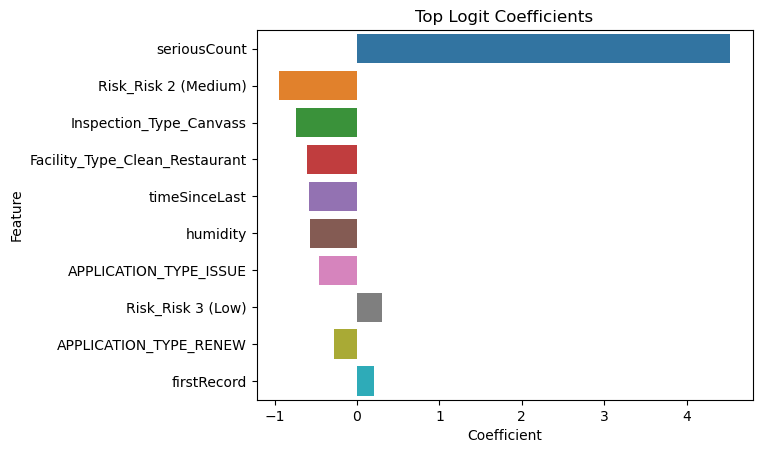

In [25]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

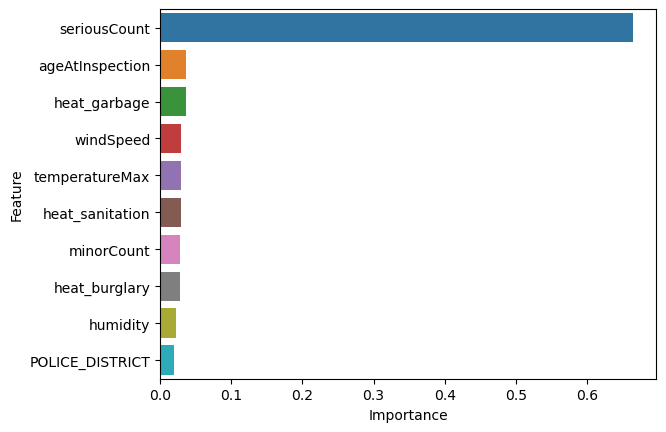

In [26]:
# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_cv.best_estimator_.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

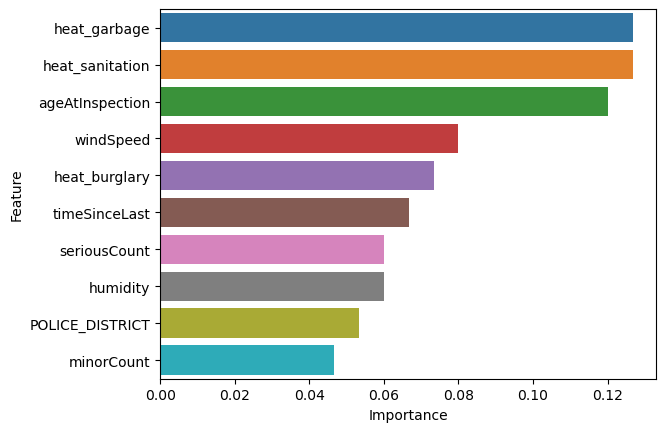

In [27]:
# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ada_cv.best_estimator_.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [28]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

In [29]:
# Pass -> 0
# Fail -> 1
list(chicago_inspections_2011_to_2013['Results'])[:10], list(y)[:10]

(['Pass',
  'Pass',
  'Fail',
  'Pass',
  'Fail',
  'Fail',
  'Pass',
  'Pass',
  'Pass',
  'Pass'],
 [array([0]),
  array([0]),
  array([1]),
  array([0]),
  array([1]),
  array([1]),
  array([0]),
  array([0]),
  array([0]),
  array([0])])

In [30]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

# predict on the validation data
y_pred = rf_cv.best_estimator_.predict(X)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------

audit_compare = X.copy()

audit_compare['Results'] = y
audit_compare['predict'] = y_pred
audit_compare['predict_proba'] = rf_cv.best_estimator_.predict_proba(X)[:,1]

audit_compare.sort_values(by='predict_proba', ascending=False).head(20)[['Results', 'predict', 'predict_proba']]

,,Results,predict,predict_proba
Inspection_ID,DBA_Name,,,
1202340,THE NEW PINDOS RESTAURANT,1,1,1.0
1170259,GREEK CORNER RESTAURANT CAFE,1,1,1.0
1227562,FAMILY DOLLAR STORE #6944,1,1,1.0
1227561,FAMILY DOLLAR STORE #6573,1,1,1.0
547863,FRANKS FOOD & LIQUOR,1,1,1.0
517600,THE GROVE RESTAURANT,1,1,1.0
547864,CVS/PHARMACY #8741,1,1,1.0
1290283,LA FUENTE,1,1,1.0
1285409,SEXTON,1,1,1.0


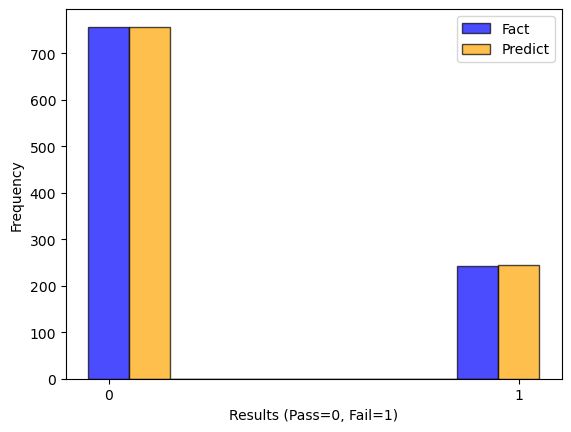

In [32]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

import matplotlib.pyplot as plt

plt.hist(y[:1000], align='left', edgecolor='black', alpha=0.7, color='blue', label='Fact')
plt.hist(y_pred[:1000], align='right', edgecolor='black', alpha=0.7, color='orange', label='Predict')


# Customize the plot
plt.xlabel('Results (Pass=0, Fail=1)')
plt.ylabel('Frequency')

# Set x-axis ticks to represent binary values (0 and 1)
plt.xticks([0, 1])

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [33]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

audit_compare.sample(n=1000, random_state=10).head(10)[['Results', 'predict', 'predict_proba']]

,,Results,predict,predict_proba
Inspection_ID,DBA_Name,,,
1285258,SUBWAY,0,0,0.010000
1353608,GOLDEN TIARA LTD,0,0,0.000000
1154370,TAURUS FLAVORS,1,1,0.958333
1235901,PIZZERIA AROMA,1,1,0.923333
1227300,VALENTINA RESTAURANT,0,0,0.000000
1150457,GILHOOLEY'S GRANDE SALOON,1,1,0.821619
1092429,EINSTEIN BROS. BAGELS # 2578,1,1,0.956667
1151866,GARIBAY POULTRY,1,1,0.667500
1361441,MART ANTHONY,0,0,0.000000


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [34]:
# data processing
# -----------


chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                         'License',
                                         'Address',
                                         'City',
                                         'State',
                                         'Zip',
                                         'Latitude',
                                         'Longitude',
                                         'Location',
                                         'ID',
                                         'LICENSE_ID',
                                         'LICENSE_TERM_START_DATE',
                                         'LICENSE_TERM_EXPIRATION_DATE',
                                         'LICENSE_STATUS',
                                         'ACCOUNT_NUMBER',
                                         'LEGAL_NAME',
                                         'DOING_BUSINESS_AS_NAME',
                                         'ADDRESS',
                                         'CITY',
                                         'STATE',
                                         'ZIP_CODE',
                                         'WARD',
                                         'PRECINCT',
                                         'LICENSE_CODE',
                                         'BUSINESS_ACTIVITY_ID',
                                         'BUSINESS_ACTIVITY',
                                         'LICENSE_NUMBER',
                                         'LATITUDE',
                                         'LONGITUDE'],
                              inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)



# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                   'minDate',
                                                                   'maxDate'],
                                                                  axis = 1)



# process features
X_test2014 = chicago_inspections_2014.drop(columns = ['Results', 
                                                      'Facility_Type', 
                                                      'LICENSE_DESCRIPTION', 
                                                      'WARD_PRECINCT'])

# get dummies
X_test2014 = pd.get_dummies(X_test2014)




# process target 
y_test2014 = chicago_inspections_2014['Results']

# binarize the outcome variable 
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)


# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)

In [35]:
# set(list(X.columns)) - set(list(X_test2014.columns))

In [36]:
# set(list(X_test2014.columns)) - set(list(X.columns))

In [37]:
# predict and compare 
# -----------

y_pred_2014 = rf_cv.best_estimator_.predict(X_test2014)



pred_2014_compare = X_test2014.copy()

pred_2014_compare['Results'] = y_test2014
pred_2014_compare['predict'] = y_pred_2014
pred_2014_compare['predict_proba'] = rf_cv.best_estimator_.predict_proba(X_test2014)[:,1]

pred_2014_compare.sort_values(by='predict_proba', ascending=False)[['Results', 'predict', 'predict_proba']]

,,Results,predict,predict_proba
Inspection_ID,DBA_Name,,,
1480376,ALL N ONE FOOD MART,1,1,1.0
1363231,EL SABOR DEL TRIUNFO,1,1,1.0
1395487,Pullman,1,1,1.0
1385739,THE AVE FOOD MART,1,1,1.0
1307660,"SUPERMERCADO LA FIESTA #2, INC.",1,1,1.0
...,...,...,...,...
1395878,"TAKITO GRILL, INC.",0,0,0.0
1395884,SARAVALE MEAT MARKET,0,0,0.0
1395885,RESTAURANT SANTIAGO,0,0,0.0


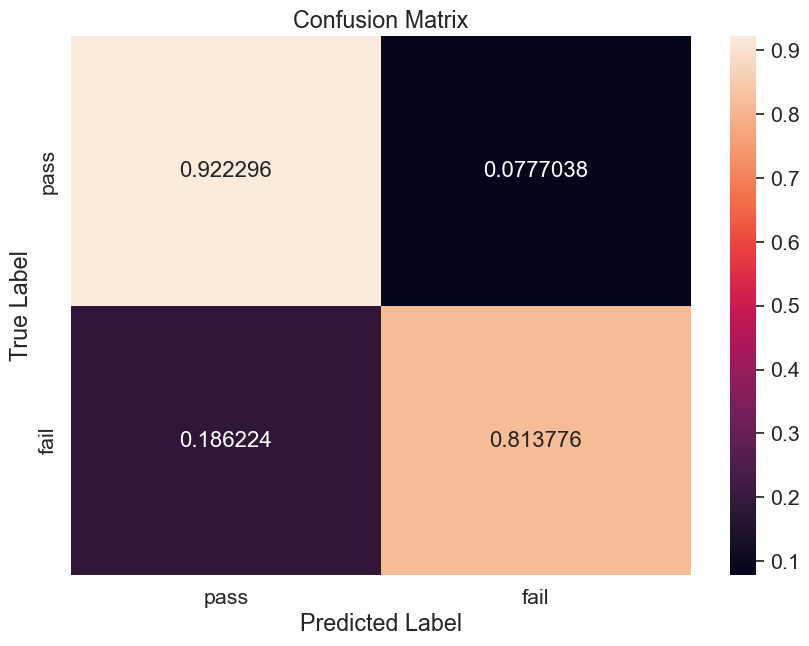

In [38]:
# evaluate
# -----------

# create a confusion matrix
cf_matrix = confusion_matrix(y_test2014, 
                             y_pred_2014, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "pass", 1: "fail"})
df_cm.index = ["pass", "fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
accuracy_score(y_test2014, y_pred_2014), recall_score(y_test2014, y_pred_2014)

(0.9006858013716027, 0.8137755102040817)

In [40]:
# same grdi values
grid_values = {'n_estimators': [100],
               'criterion': ['gini'],
               'max_depth': [None],
               'min_samples_split': [2,3,4,5],
               'min_samples_leaf': [1],
               'min_weight_fraction_leaf': [0.0],
               'max_features': [None],
               'max_leaf_nodes': [None],
               'min_impurity_decrease': [1e-07],
               'random_state': [10]} 

rf_classifier = RandomForestClassifier()
cv = KFold(n_splits=5,random_state=10,shuffle=True) 

# change scoring from accuracy to recall
rf_cv_recall = GridSearchCV(rf_classifier, param_grid=grid_values, scoring='recall', cv=cv, verbose=0)
rf_cv_recall.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [1e-07],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'random_state': [10]},
             scoring='recall')

In [41]:
y_pred_2014_recall = rf_cv_recall.best_estimator_.predict(X_test2014)

accuracy_score(y_test2014, y_pred_2014_recall), recall_score(y_test2014, y_pred_2014_recall)

(0.9006858013716027, 0.8137755102040817)

|                                       | Accuracy    | Recall    |
| ------------------------------------- | ----------- | --------- |
| RF trained with scoring of accuracy   | 0.9007      | 0.8138    |
| RF trained with scoring of recall     | 0.9007      | 0.8138    |

The two random forest models trained with different scoring parameters of accuracy and recall return the same results.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**
\
Accuracy is not always the best standard to compare the performance of different models. There are cases in which other standards are more helpful. For this case of Chicago inspections, the model with a higher correct prediction rate on the failing inspection results is better. So, recall rate is more important than accuracy. Similar concepts apply to the parole prediction in a reading a few weeks ago.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**

1. The policymaker can lower the probability threshold, like from 0.5 to 0.4, in the algorithm to reduce the probability of missing/skipping a failing inspection result.
2. In additionto the ones picked by the algorithm, the policymakers can randomly choose some to inspect. This inspection result should be compared to algorithm's result as verification of algorithm's reliability.